<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Pendulum, double pendulum and chaos </h2>
    <h2> <a href="#acknowledgements"> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.04</h2>
</center>

<div id='toc' />

## Table of Contents
* [Source](#source)
* [The Pendulum](#pendulum)
* [Double Pendulum and chaos](#doublependulum)
* [Challenge: Adding friction and forcing](#challenge)
* [Acknowledgements](#acknowledgements)

In [1]:
from ipywidgets import interact, fixed, IntSlider, FloatSlider, Checkbox
import sympy as sym
sym.init_printing()
import numpy as np
import ipywidgets as widgets

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
from matplotlib import rc
#rc('text', usetex=True)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Wedge
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

<div id='source' />

# Sources
[Back to TOC](#toc)

- See Textbook: Numerical Analysis, Timothy Sauer, 2nd Edition, page 305.
- https://en.wikipedia.org/wiki/Pendulum_(mathematics)
- https://en.wikipedia.org/wiki/Double_pendulum
- https://scienceworld.wolfram.com/physics/DoublePendulum.html
- https://demonstrations.wolfram.com/DoublePendulum/
- **World Pendulum Alliance**: http://wpa.tecnico.ulisboa.pt/~wpa.daemon/
- **World Pendulum Alliance at USM**: http://wpa.tecnico.ulisboa.pt/~wpa.daemon/hei-partners/p10-universidad-tecnica-federico-santa-maria-utfsm/

<div id='source' />

# The Pendulum
[Back to TOC](#toc)

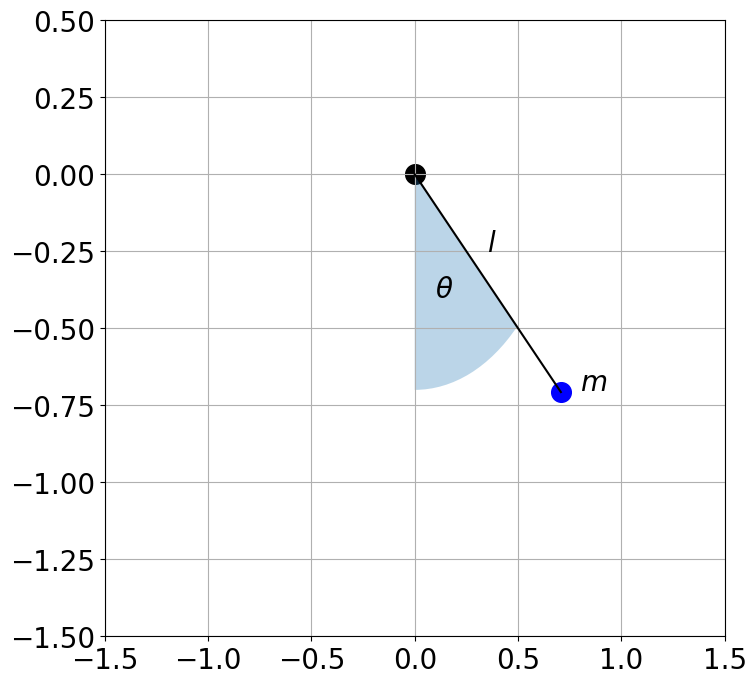

In [2]:
plt.figure(figsize=(8,8))
ax=plt.gca()
theta0=np.pi/4
x=np.sin(theta0)
y=-np.cos(theta0)
plt.plot([0, x],[0, y],'-k')
plt.scatter(x, y, s=200, marker='o', c='b')
plt.scatter(0, 0, s=200, marker='o', c='k')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,0.5])
plt.grid(True)
patches=[]
wedge = mpatches.Wedge((0, 0), 0.7, 270, 270+45, ec="none")
patches.append(wedge)
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
ax.add_collection(collection)
plt.text(0.1, -0.4, r'$\theta$', fontsize=20)
plt.text(0.8, -0.7, r'$m$', fontsize=20)
plt.text(0.35, -0.25, r'$l$', fontsize=20)
plt.show()

In the previous Figure we showed the components that will be included in the modeling of The Pendulum without fricction under the influence of gravity.
This means we have the pivot denoted by the black point at coordinates $(0,0)$, the mass $m$ handging from the rigid rod of length $l$, and the angl $\theta$ generated between the vertical line below the pivot and the rigid rod.

Differential equation for the evolution of the angle of a pendulum. 
\begin{align*}
    \ddot{\theta}(t) &=-\dfrac{g}{l}\,\sin(\theta(t))\\
    \theta(0)        &= \theta_0\\
    \dot{\theta}(0)  &= \omega_0
\end{align*}
This is actually an Initial Value Problem, i.e. it is a differential equation that models the evolution of the angle between the vertical axis and a rigid pendulum.

## Translating the equation for the pendulum into a code:

In [3]:
def myFirstPendulum(t,y,g,l,m):
    theta, omega = y
    return np.array([omega,-g/l*np.sin(theta)])

## Now solving the differential equation

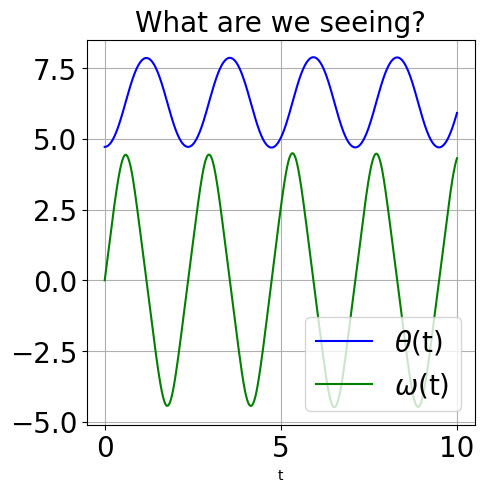

In [4]:
def solve_pendulum(N=1000, T=10, y0=np.array([3*np.pi/2, 0.0]),args=(9.8,1,1)):
    t_eval = np.linspace(0, T, N)
    sol = solve_ivp(myFirstPendulum, t_span=(0,T), y0=y0, t_eval=t_eval, args=args)
    return t_eval, sol.y

t, sol = solve_pendulum()
thetas=sol[0,:]
omegas=sol[1,:]

plt.figure(figsize=(5,5))
plt.plot(t, thetas, 'b', label=r'$\theta$(t)')
plt.plot(t, omegas, 'g', label=r'$\omega$(t)')
plt.legend(loc='lower right',fontsize=20)
plt.xlabel('t')
plt.grid()
plt.title('What are we seeing?', fontsize=20)
plt.show()

## Now, this is a pendulum 'moving'! (with interact)

In [5]:
def plot_pendulum(k,thetas,t):
    plt.figure(figsize=(10,5))
    
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    
    x   = np.sin(thetas[k])
    y   = -np.cos(thetas[k])
    ax1.plot([0, x],[0, y],'-k')
    ax1.scatter(x, y, s=200, marker='o', c='b')
    ax1.set_xlim([-1.5,1.5])
    ax1.set_ylim([-1.5,1.5])
    ax1.grid(True)
    ax1.set_title("Time t= %.2f" % (t[k]), fontsize=20)
    
    ax2.plot(t[:k], thetas[:k], 'b', label=r'$\theta$(t)')
    ax2.legend(loc='lower right',fontsize=20)
    ax2.set_xlabel('t', fontsize=20)
    ax2.set_xlim([0,t[-1]])
    ax2.set_ylim([np.min(thetas)*0.9,np.max(thetas)*1.1])
    ax2.grid(True)
    
    plt.show()

In [6]:
interact(plot_pendulum, k=widgets.IntSlider(min=0, max=999, step=10, value=0), thetas=fixed(thetas), t=fixed(t))

interactive(children=(IntSlider(value=0, description='k', max=999, step=10), Output()), _dom_classes=('widget-…

<function __main__.plot_pendulum(k, thetas, t)>

## In this case we can change the initial angle $\theta_0$ and the initial angular velocity $\omega_0$. We only plot $\theta(t)$.

In [7]:
def plot_pendulum2(k,theta0, omega0):

    plt.figure(figsize=(10,5))
    # We need to solve the whole problem again for each different initial angle,
    # since we are changing the initial condition.
    t, sol = solve_pendulum(y0=np.array([theta0, omega0]))
    thetas = sol[0,:]
    
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    
    x   = np.sin(thetas[k])
    y   = -np.cos(thetas[k])
    ax1.plot([0, x],[0, y],'-k')
    ax1.scatter(x, y, s=200, marker='o', c='b')
    ax1.set_xlim([-1.5,1.5])
    ax1.set_ylim([-1.5,1.5])
    ax1.grid(True)
    ax1.set_title("Time t= %.2f" % (t[k]), fontsize=20)
    
    ax2.plot(t[:k], thetas[:k], 'b', label=r'$\theta$(t)')
    ax2.legend(loc='lower right',fontsize=20)
    ax2.set_xlabel('t', fontsize=20)
    ax2.set_xlim([0,t[-1]])
    ax2.set_ylim([np.min([np.min(thetas*1.1),-np.pi/2.]),np.max([np.max(thetas*1.1),np.pi/2])])
    ax2.grid(True)
    
    plt.show()
    
    print('k',k)
    print('theta[k]',thetas[k])
    print('theta0',theta0)

In [8]:
interact(plot_pendulum2,k=widgets.IntSlider(min=0, max=999, step=1, value=0),
    theta0=widgets.FloatSlider(min=0., max=2.*np.pi, step=3.*np.pi/100., value=3.*np.pi/2.),
    omega0=widgets.FloatSlider(min=-5., max=5., step=0.01, value=0.))

interactive(children=(IntSlider(value=0, description='k', max=999), FloatSlider(value=4.71238898038469, descri…

<function __main__.plot_pendulum2(k, theta0, omega0)>

## Now, we model $M$ pendulums with different rod length $l$.

In [9]:
def plot_pendulum3(k, theta0, omega0, M, FLAG_3D=False):
    plt.figure(figsize=(16,8))
    
    colors = cm.rainbow(np.linspace(0, 1, M))
    
    
    ax1 = plt.subplot(121)
    if FLAG_3D:
        ax2 = plt.subplot(122, projection='3d')
    else:
        ax2 = plt.subplot(122)
    
        
    Ls=np.linspace(0.05,0.2,10)[::-1]
    for i in np.arange(M):
        l=Ls[i]
        t, sol = solve_pendulum(y0=np.array([theta0, omega0]), args=(9.8,l,1))
        thetas = sol[0,:]
        
        # We are just dividing by 0.2 to scale the rods for plottting purposes.
        x   = np.sin(thetas[k])*l/0.2
        y   = -np.cos(thetas[k])*l/0.2
        ax1.plot([0, x],[0, y],'-k',alpha=0.2)
        ax1.scatter(x, y, s=200, marker='o', color=colors[i])
        ax1.set_xlim([-1.5,1.5])
        ax1.set_ylim([-1.5,1.5])
        ax1.grid(True)
        ax1.set_title("Time t= %.2f" % (t[k]), fontsize=20)

        if FLAG_3D:
            ax2.plot(t[:k], t[:k]*0+l, thetas[:k])
        else:        
            ax2.plot(t[:k], thetas[:k], color=colors[i])
            #ax2.set_ylim([np.min(thetas)*0.9, np.max(thetas)*1.1])
            ax2.set_ylim([np.min([np.min(thetas*1.1),-np.pi/2.]),np.max([np.max(thetas*1.1),np.pi/2])])
            ax2.grid(True)
        
    if FLAG_3D:
        ax2.view_init(elev=60,azim=35)
        ax2.set_ylabel(r'$l$', fontsize=20)
        ax2.set_zlabel(r'$\theta$', fontsize=20)
    ax2.set_xlabel(r'$t$', fontsize=20)
        
    plt.show()

In [10]:
k_widget3      = IntSlider(min=0, max=1000-1, step=10, value=0)
theta0_widget3 = FloatSlider(min=0, max=2*np.pi, step=3.*np.pi/100., value=3.*np.pi/2.)
omega0_widget3 = FloatSlider(min=-5, max=5, step=0.1, value=0)
M_widget3      = IntSlider(min=1, max=10, step=1, value=5)

interact(plot_pendulum3, k=k_widget3, 
         theta0=theta0_widget3, omega0=omega0_widget3, 
         M=M_widget3,
         FLAG_3D=Checkbox(value=False, description='Show 3D plot'))

interactive(children=(IntSlider(value=0, description='k', max=999, step=10), FloatSlider(value=4.7123889803846…

<function __main__.plot_pendulum3(k, theta0, omega0, M, FLAG_3D=False)>

<div id='doublependulum' />

# Double Pendulum and chaos
[Back to TOC](#toc)

Source: https://demonstrations.wolfram.com/DoublePendulum/ and https://scienceworld.wolfram.com/physics/DoublePendulum.html

In this case the components are pretty much the same, the main difference is that now we have a second pendulum that it attached to the mass $m_1$, Figure below for an sketch of how the second pendulum is included.

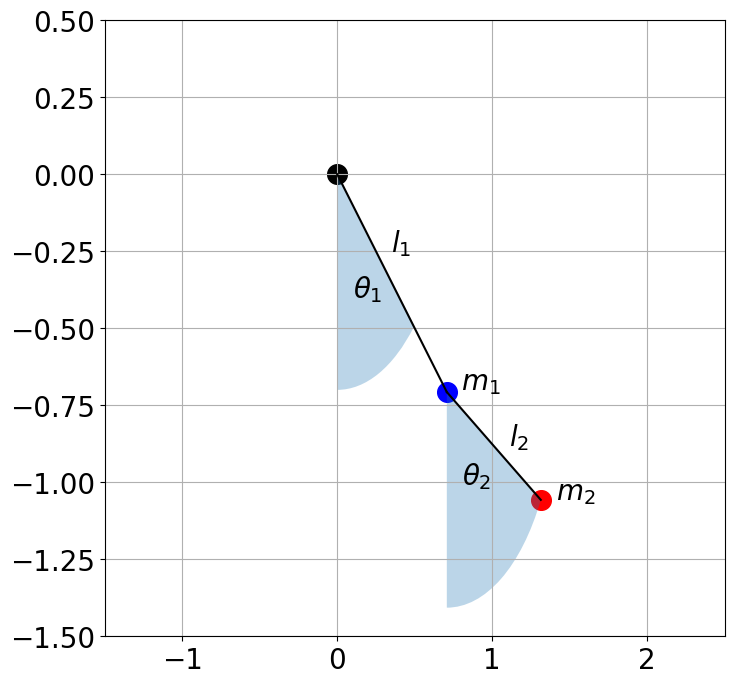

In [11]:
plt.figure(figsize=(8,8))
ax=plt.gca()
theta0=np.pi/4
theta1=np.pi/3
x1=np.sin(theta0)
y1=-np.cos(theta0)
x2=x1+0.7*np.sin(theta1)
y2=y1-0.7*np.cos(theta1)
plt.plot([0, x1],[0, y1],'-k')
plt.plot([x1, x2],[y1, y2],'-k')
plt.scatter(x1, y1, s=200, marker='o', c='b')
plt.scatter(x2, y2, s=200, marker='o', c='r')
plt.scatter(0, 0, s=200, marker='o', c='k')
plt.xlim([-1.5,2.5])
plt.ylim([-1.5,0.5])
plt.grid(True)
patches=[]
wedge1 = mpatches.Wedge((0, 0), 0.7, 270, 270+45, ec='none')
wedge2 = mpatches.Wedge((x, y), 0.7, 270, 270+60, ec='none')
patches.append(wedge1)
patches.append(wedge2)
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
ax.add_collection(collection)
plt.text(0.1, -0.4, r'$\theta_1$', fontsize=20)
plt.text(x1+0.1, y1-0.3, r'$\theta_2$', fontsize=20)
plt.text(0.8, -0.7, r'$m_1$', fontsize=20)
plt.text(x2+0.1, y2, r'$m_2$', fontsize=20)
plt.text(0.35, -0.25, r'$l_1$', fontsize=20)
plt.text(0.5*(x1+x2)+0.1, 0.5*(y1+y2), r'$l_2$', fontsize=20)
plt.show()

The equations will be omitted but we refer to the interested reader to look at https://demonstrations.wolfram.com/DoublePendulum/ and https://scienceworld.wolfram.com/physics/DoublePendulum.html.

In [12]:
def doublePendulum(t, y, l1, l2, m1, m2, g):
    th1  = y[0]
    th2  = y[1]
    th1p = y[2]
    th2p = y[3]
    th1pp = -((g*(2*m1 + m2)*np.sin(th1) + g*m2*np.sin(th1 - 2*th2) + 
               2*m2*(l2*th2p**2 + l1*th1p**2*np.cos(th1 - th2))*np.sin(th1 - th2))
              /(2*l1*(m1 + m2 - m2*np.cos(th1 - th2)**2)))
    th2pp = (((m1 + m2)*(l1*th1p**2 + g*np.cos(th1))+
              l2*m2*th2p**2*np.cos(th1 - th2))*
             np.sin(th1 - th2))/(l2*(m1 + m2 - m2*np.cos(th1 - th2)**2))
    return np.array([th1p,th2p,th1pp,th2pp])

In [13]:
def plotDoblePendulum(k=0, T=10, N=1000, th10=np.pi, ome10=2, th20=-np.pi/2, ome20=-2):
    l1 = 1
    l2 = 1
    m1 = 1
    m2 = 1
    g  = 9.8
    
    t  = np.linspace(0,T,N) 
    
    y0 = np.array([th10, th20, ome10, ome20])
    sol = solve_ivp(doublePendulum, t_span=(0,T), y0=y0, t_eval=t, args=(l1, l2, m1, m2, g))
    
    # Plotting trajectories
    theta1 = sol.y[0,:k]
    theta2 = sol.y[1,:k]
    x1     = l1*np.sin(theta1)
    y1     = -l1*np.cos(theta1)
    x2     = x1+l2*np.sin(theta2)
    y2     = y1-l2*np.cos(theta2)
    
    plt.figure(figsize=(16,8))
    
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    
    ax1.plot(x1,y1,'-ob', alpha=0.05)
    ax1.plot(x2,y2,'-or', alpha=0.05)
    
    # Plotting function values
    ax2.plot(t[:k], theta1, 'b', label=r'$\theta_1$(t)')
    ax2.plot(t[:k], theta2, 'r', label=r'$\theta_2$(t)')
    ax2.legend(loc='lower right',fontsize=20)
    ax2.set_xlabel(r'$t$', fontsize=20)
    ax2.set_xlim([0,t[-1]])
    ax2.grid(True)
    
    # Plotting masses
    theta1 = sol.y[0,k]
    theta2 = sol.y[1,k]
    x1     = l1*np.sin(theta1)
    y1     = -l1*np.cos(theta1)
    x2     = x1+l2*np.sin(theta2)
    y2     = y1-l2*np.cos(theta2)
    ax1.plot([0, x1],[0, y1],'-k')
    ax1.plot([x1, x2],[y1, y2],'-k')
    ax1.scatter(x1, y1, s=200, marker='o', c='b')
    ax1.scatter(x2, y2, s=200, marker='o', c='r')
    
    # Extra plottting configurations
    ax1.grid(True)
    ax1.set_title("Time t= %.2f" % (t[k]), fontsize=20)
    #plt.axis('equal')
    ax1.set_xlim([-2.5,2.5])
    ax1.set_ylim([-2.5,2.5])
    
    plt.show()
    
k_widget = IntSlider(min=0, max=1000-1, step=10, value=0)

## Running the double pendulum numerical simulation
Here, we added the trajectory of both pendulums.
In the previous case, i.e. only one pendulum, the trajectory was always within a circle, however the second pendulum does not have to follow that!

In [14]:
interact(plotDoblePendulum,k=k_widget,T=(10,50,10), N=fixed(1000),
        th10=(-np.pi,np.pi,np.pi/8),
        ome10=(-5,5,0.1),
        th20=(-np.pi,np.pi,np.pi/8),
        ome20=(-5,5,0.1))

interactive(children=(IntSlider(value=0, description='k', max=999, step=10), IntSlider(value=10, description='…

<function __main__.plotDoblePendulum(k=0, T=10, N=1000, th10=3.141592653589793, ome10=2, th20=-1.5707963267948966, ome20=-2)>

## Showing Chaos in a double pendulum!
The main idea here is to run two simulations where the only difference between the numerical simulation is that only one initial conditions was perturbed respet to the otehr one.
This perturnation will be denoted as $\delta$ in the code.
See the next cell with comments.

In [15]:
def solveDoblePendulum(T=10 , N=100, y0=np.array([np.pi/2,np.pi/2,2,-2]), args=(1,1,1,1,9.8)):

    l1, l2, m1, m2, g = args
    
    t  = np.linspace(0,T,N) 
    
    #y0 = np.array([np.pi/2,np.pi/2,2,-2])
    sol = solve_ivp(doublePendulum, t_span=(0,T), y0=y0, t_eval=t, args=(l1, l2, m1, m2, g))
    return t, sol.y

def plotFastDoblePendulum(axT, axF, t, sol, T, k=0, args=(1,1,1,1,9.8), color_1st_mass='b', color_2nd_mass='r'):
   
    l1, l2, m1, m2, g = args

    theta1 = sol[0,:k]
    theta2 = sol[1,:k]
    
    # Plotting angles
    axF.plot(t[:k],theta1,'-', c=color_1st_mass)
    axF.plot(t[:k],theta2,'-', c=color_2nd_mass)
    axF.grid(True)
    axF.set_title("Time t= %.2f" % (t[k]), fontsize=20)
    axF.set_xlim([0, T])
    
    # Plotting Trajectories
    x1     = l1*np.sin(theta1)
    y1     = -l1*np.cos(theta1)
    x2     = x1+l2*np.sin(theta2)
    y2     = y1-l2*np.cos(theta2)
    axT.plot(x1,y1,'-o', alpha=0.05, c=color_1st_mass)
    axT.plot(x2,y2,'-o', alpha=0.05, c=color_2nd_mass)
    
    # Plotting masses Trajectories
    theta1 = sol[0,k]
    theta2 = sol[1,k]
    x1     = l1*np.sin(theta1)
    y1     = -l1*np.cos(theta1)
    x2     = x1+l2*np.sin(theta2)
    y2     = y1-l2*np.cos(theta2)
    axT.plot([0, x1],[0, y1],'-k')
    axT.plot([x1, x2],[y1, y2],'-k')
    axT.scatter(x1, y1, s=200, marker='o', c=color_1st_mass)
    axT.scatter(x2, y2, s=200, marker='o', c=color_2nd_mass)
    
    # Extra plottting configurations
    axT.grid(True)
    axT.set_title("Time t= %.2f" % (t[k]), fontsize=20)
    axT.set_xlim([-2.5,2.5])
    axT.set_ylim([-2.5,2.5])

Here we add the perturbation $\delta$.
Please play with the values and analyze the output!

In [16]:
delta = -0.1

y01=np.array([np.pi/2,np.pi/2,2,-2])
y02=np.array([np.pi/2,np.pi/2,2,-2+delta])

N = 1000
T = 20
args = (1,1,1,1,9.8)
t1, sol1 = solveDoblePendulum(T=T, N=N, y0=y01, args=args)
t2, sol2 = solveDoblePendulum(T=T, N=N, y0=y02, args=args)

def plotSeveralPendulums(k=10):
    
    plt.figure(figsize=(15,10))    
    ax1 = plt.subplot(231)
    ax2 = plt.subplot(232)
    ax3 = plt.subplot(233)
    ax4 = plt.subplot(234)
    ax5 = plt.subplot(235)
    ax6 = plt.subplot(236)
    
    plotFastDoblePendulum(ax1, ax4, t1, sol1, T, k, args=args)
    plotFastDoblePendulum(ax2, ax5, t1, sol1, T, k, args=args)
    plotFastDoblePendulum(ax2, ax5, t2, sol2, T, k, args=args, color_1st_mass='m', color_2nd_mass='g')
    plotFastDoblePendulum(ax3, ax6, t2, sol2, T, k, args=args, color_1st_mass='m', color_2nd_mass='g')
    
    min_y = min(np.min(sol1[:]),np.min(sol2[:]))
    max_y = max(np.max(sol1[:]),np.max(sol2[:]))
    
    ax4.set_ylim([min_y, max_y])
    ax5.set_ylim([min_y, max_y])
    ax6.set_ylim([min_y, max_y])
    
    plt.show()

Notice that the original double pendulum is on the first column of plots, the perturbed double pendulum is on the third column, and we include the data for both of the in the second (central) column of plots.

In [17]:
interact(plotSeveralPendulums,k=(0,N-1,10))

interactive(children=(IntSlider(value=10, description='k', max=999, step=10), Output()), _dom_classes=('widget…

<function __main__.plotSeveralPendulums(k=10)>

The conclusion here is that even very small perturbation in a double pendulum show very different trajectories of the masses!
This is the beggining of chaos! See https://en.wikipedia.org/wiki/Chaos_theory

<div id='challenge' />

# Challenge: Adding friction and forcing
[Back to toc](#toc)

Add friction and a forcing term to the pendulums! 
1. The current model of the pendulums generate pendulums that will not stop since they don't loss energy, however a real life pendulum will lose energy.
2. Also, one could have a pendulum inmerse in a medium where there exists external forces, such as wind, etc. How woul you include this?
3. Last and not least, one could consider in having a heavy pendulum hanging from a more or less long rod. Morever, consider that pendulum is perturbed a little bit from the steady state. How can you use the knowledge adquire is this jupyter notebook to measure the gravity constant from real data obtained from a real pendulum?

<div id='acknowledgements' />

# Acknowledgements
[Back to toc](#toc)

* _Material originally created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`) _. DI UTFSM. October 2019._
* _Update July 2021 - v1.01 - C.Torres_ : Adding double pendulum.
* _Update July 2021 - v1.02 - C.Torres_ : Adding reference to World Pendulum Alliance.
* _Update June 2022 - v1.03 - C.Torres_ : Removing explicit LaTeX dependency, i.e. commenting out _rc('text', usetex=True)_.
* _Update October 2023 - v1.04 - C.Torres_ : Removing _odeint_ dependecy and using _solve_ivp_ from _SciPy_.